## TO DO
* IMAGE SIZE - 512 * 64 (why?)
* try spectogram: chromagram (raw waveforms (not a spect.))
* try transformer

* TRY NORMALISE THE CHROMAGRAM
* SR - TRY TO TAKE SR VALUES FROM THE DATASET

# Utils

* https://analyticsindiamag.com/a-tutorial-on-spectral-feature-extraction-for-audio-analytics/

* https://ridakhan5.medium.com/audio-clustering-with-deep-learning-a7991d605fa5

* https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

* https://www.researchgate.net/publication/333427516_Feature_Learning_for_Bird_Call_Clustering

* https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225

* https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

* https://musicinformationretrieval.com/kmeans.html

* Feature Normalization: https://www.hackaudio.com/digital-signal-processing/amplitude/peak-normalization/#:~:text=Normalizing%20the%20amplitude%20of%20a,magnitude%20equals%20a%20specified%20level.&text=This%20opens%20in%20a%20new%20window.&text=Peak%20amplitude%20is%20a%20measurement%20based%20the%20instantaneous%20level%20of%20a%20signal.

* https://www.audiolabs-erlangen.de/resources/MIR/FMP/C3/C3S1_FeatureNormalization.html


In [1]:
#!pip install librosa
from pathlib import Path
import os
import pandas as pd
import librosa
import re
import matplotlib.pyplot as plt

In [2]:
#constants
SR = 22050

In [3]:
DIR = './dataset/songs_extracted'

In [4]:
#function that loads the songs from the songs_extracted dataset
def load_songs_extracted(directory):
    data = []
    for bird_names in os.listdir(directory):
        path_bird_names = os.path.join(directory, bird_names)
        if os.path.isdir(path_bird_names):
            for channel in os.listdir(path_bird_names):
                if channel == "CH2":
                    path_channel  = os.path.join(path_bird_names, channel)
                    if os.path.isdir(path_channel):
                        for song in  os.listdir(path_channel):
                            song_num = int(re.search('\d+', song).group())
                            path_song = os.path.join(path_channel, song)
                            signal, sr = librosa.load(path_song)
                            data.append([bird_names, song_num, sr, signal]) #channel is CH2 by default

    # return dataframe creation
    return pd.DataFrame(data, columns=['bird', 'song', 'sr', 'signal'])

In [5]:
df = load_songs_extracted(Path(DIR))
df.head()

,bird,song,sr,signal
0,andrei_bos,1,22050,"[8.5976695e-05, 2.9542274e-05, 1.942474e-05, 6..."
1,andrei_bos,10,22050,"[-0.0036385355, -0.0036303482, 0.00060955447, ..."
2,andrei_bos,100,22050,"[0.0046478678, 0.0069209742, 0.0035229707, -1...."
3,andrei_bos,101,22050,"[0.0035249959, 0.004198667, 0.0008914086, -0.0..."
4,andrei_bos,102,22050,"[-0.004434305, -0.0046334974, -0.0007038029, 0..."


In [6]:
df.shape

(5287, 4)

In [7]:
chromagrams = []
for signal in df['signal']:
    chrom = librosa.feature.chroma_stft(y=signal, sr=SR)
    chromagrams.append(chrom)

C:\Users\ire20\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=316
  return f(*args, **kwargs)
C:\Users\ire20\AppData\Local\Programs\Python\Python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


In [8]:
chromagrams

[array([[0.0373789 , 0.05205457, 0.15514229, ..., 0.87194437, 0.6726676 ,
         0.3846919 ],
        [0.02161774, 0.03080231, 0.19909424, ..., 0.6271235 , 0.48427036,
         0.3778922 ],
        [0.02353745, 0.0650466 , 0.6509864 , ..., 0.6607577 , 0.62869996,
         0.70549846],
        ...,
        [0.5078368 , 0.38259563, 0.25413355, ..., 0.22709066, 0.13416693,
         0.17445014],
        [1.        , 1.        , 0.65410113, ..., 0.369717  , 0.2137664 ,
         0.20551339],
        [0.6415568 , 0.761663  , 0.6195146 , ..., 0.47027832, 0.3140855 ,
         0.26446366]], dtype=float32),
 array([[0.20873   , 0.22894037, 0.05561665, ..., 0.15563716, 0.26318273,
         0.35125548],
        [0.20564213, 0.2798893 , 0.04508494, ..., 0.26640657, 0.29051542,
         0.23037878],
        [0.3504832 , 0.43844917, 0.05409046, ..., 0.42106047, 0.33847618,
         0.24166647],
        ...,
        [0.35811445, 0.6274381 , 1.        , ..., 0.43753147, 0.54580003,
         0.59159106

In [9]:
import IPython.display as ipd
ipd.Audio(df.iloc[0]['signal'], rate=SR)

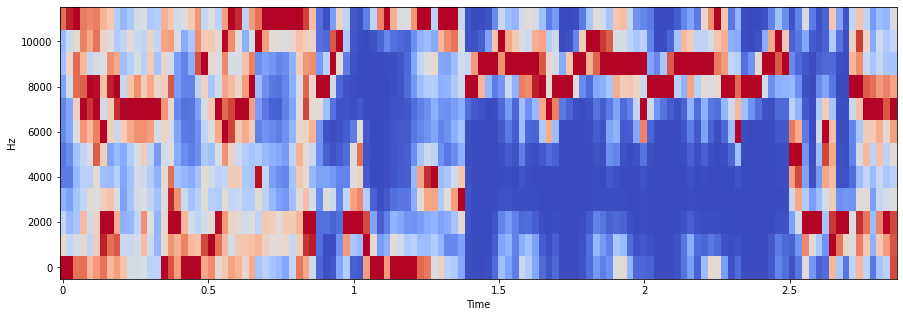

In [19]:
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagrams[2], x_axis='time', y_axis='hz', hop_length=512, cmap='coolwarm')

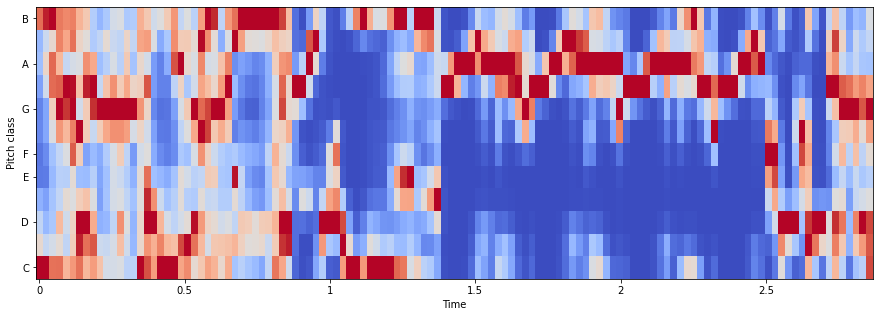

In [18]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagrams[2], x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

In [11]:
def feature_normalisation(df: pd.DataFrame):
    df_norm = df.copy()
    #normalisation
    
    return df_norm